In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time as time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=83e4bafbffc32b58f732abbb170824ff


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=83e4bafbffc32b58f732abbb170824ff&q=Boston


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | nome
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | yaan
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | rocha
Processing Record 10 of Set 1 | grahamstown
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | cascais
Processing Record 13 of Set 1 | petervasara
Processing Record 14 of Set 1 | lamu
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | te anau
Processing Record 17 of Set 1 | dingle
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | dusetos
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | humaita
Processing Record 22 of Set 1 | saint anthony
Processing Record 23 of Set 1 | lebu
Processing Record 24 of Set 1 | high level
Processing Record 25 of Set 1 | ush

Processing Record 39 of Set 4 | nadym
Processing Record 40 of Set 4 | svetlaya
Processing Record 41 of Set 4 | yverdon
City not found. Skipping...
Processing Record 42 of Set 4 | sioux lookout
Processing Record 43 of Set 4 | sarankhola
Processing Record 44 of Set 4 | yemelyanovo
Processing Record 45 of Set 4 | moron
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | indramayu
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | kenai
Processing Record 50 of Set 4 | taixing
Processing Record 1 of Set 5 | baykit
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | aleppo
Processing Record 4 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 5 of Set 5 | asfi
Processing Record 6 of Set 5 | los llanos de aridane
Processing Record 7 of Set 5 | meulaboh
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | sao miguel do araguaia
Processing Record 10 of Set 5 | deputatskiy
Processing Record 11 of Set 5 | 

Processing Record 28 of Set 8 | ghamarwin
City not found. Skipping...
Processing Record 29 of Set 8 | salekhard
Processing Record 30 of Set 8 | senanga
Processing Record 31 of Set 8 | aksaray
Processing Record 32 of Set 8 | vanavara
Processing Record 33 of Set 8 | saint quentin
City not found. Skipping...
Processing Record 34 of Set 8 | lagoa
Processing Record 35 of Set 8 | sao filipe
Processing Record 36 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 37 of Set 8 | ugoofaaru
Processing Record 38 of Set 8 | chagoda
Processing Record 39 of Set 8 | porto-vecchio
Processing Record 40 of Set 8 | komsomolskiy
Processing Record 41 of Set 8 | pontes e lacerda
Processing Record 42 of Set 8 | saryg-sep
Processing Record 43 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 8 | takikawa
Processing Record 45 of Set 8 | aflu
City not found. Skipping...
Processing Record 46 of Set 8 | burica
City not found. Skipping...
Processing Record 47 of Set 

Processing Record 14 of Set 12 | hirara
Processing Record 15 of Set 12 | buraydah
Processing Record 16 of Set 12 | whyalla
Processing Record 17 of Set 12 | oparino
Processing Record 18 of Set 12 | warmbad
Processing Record 19 of Set 12 | saint-michel-des-saints
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | maldonado
Processing Record 22 of Set 12 | shingu
Processing Record 23 of Set 12 | masvingo
Processing Record 24 of Set 12 | nchelenge
Processing Record 25 of Set 12 | galle
Processing Record 26 of Set 12 | asyut
Processing Record 27 of Set 12 | sorvag
City not found. Skipping...
Processing Record 28 of Set 12 | ye
City not found. Skipping...
Processing Record 29 of Set 12 | kuchera
Processing Record 30 of Set 12 | pau
Processing Record 31 of Set 12 | uppsala
Processing Record 32 of Set 12 | kyshtovka
Processing Record 33 of Set 12 | ruwi
Processing Record 34 of Set 12 | gardner
Processing Record 35 of Set 12 | sri aman
Processing Record 36 of Set 1

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.97,102.50,24.28,98,100,13.13,RU,2020-10-04 01:30:30
1,Thompson,55.74,-97.86,39.20,80,75,3.36,CA,2020-10-04 01:30:30
2,Nome,64.50,-165.41,48.99,87,90,3.33,US,2020-10-04 01:30:30
3,Butaritari,3.07,172.79,81.37,71,100,8.72,KI,2020-10-04 01:30:30
4,Busselton,-33.65,115.33,62.01,50,4,11.79,AU,2020-10-04 01:30:30
5,Yaan,7.38,8.57,73.51,98,97,5.68,NG,2020-10-04 01:30:30
6,Punta Arenas,-53.15,-70.92,46.40,61,75,24.16,CL,2020-10-04 01:29:20
7,Kapaa,22.08,-159.32,87.80,66,1,9.17,US,2020-10-04 01:30:31
8,Rocha,-34.48,-54.33,45.81,79,35,6.98,UY,2020-10-04 01:30:31
9,Grahamstown,-33.30,26.53,51.22,99,74,3.78,ZA,2020-10-04 01:30:31


In [12]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2020-10-04 01:30:30,71.97,102.50,24.28,98,100,13.13
1,Thompson,CA,2020-10-04 01:30:30,55.74,-97.86,39.20,80,75,3.36
2,Nome,US,2020-10-04 01:30:30,64.50,-165.41,48.99,87,90,3.33
3,Butaritari,KI,2020-10-04 01:30:30,3.07,172.79,81.37,71,100,8.72
4,Busselton,AU,2020-10-04 01:30:30,-33.65,115.33,62.01,50,4,11.79
5,Yaan,NG,2020-10-04 01:30:30,7.38,8.57,73.51,98,97,5.68
6,Punta Arenas,CL,2020-10-04 01:29:20,-53.15,-70.92,46.40,61,75,24.16
7,Kapaa,US,2020-10-04 01:30:31,22.08,-159.32,87.80,66,1,9.17
8,Rocha,UY,2020-10-04 01:30:31,-34.48,-54.33,45.81,79,35,6.98
9,Grahamstown,ZA,2020-10-04 01:30:31,-33.30,26.53,51.22,99,74,3.78


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

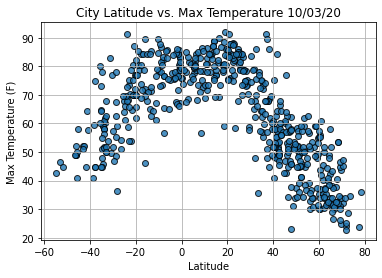

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

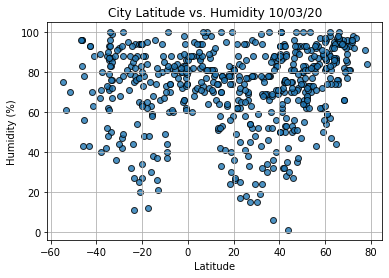

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

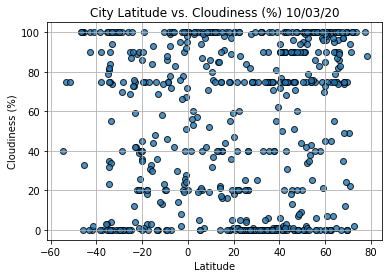

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


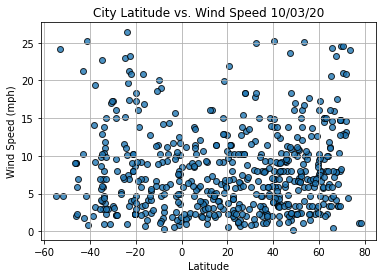

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [38]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


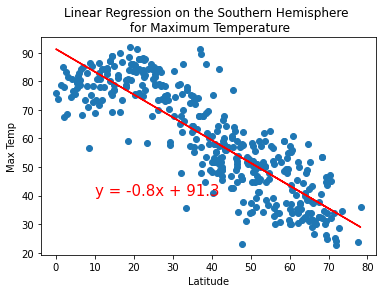

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.

plot_linear_regression(x_values, y_values,plt.title('Linear Regression on the northern Hemisphere \n for Maximum Temperature'),'Max Temp',(10,40))
                       

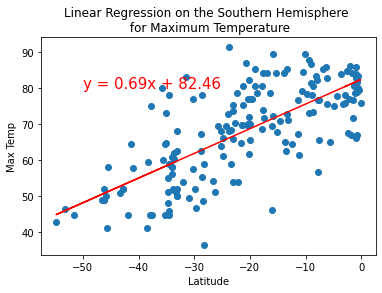

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature'), 'Max Temp',(-50,80))


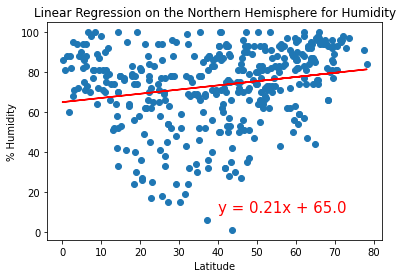

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,plt.title('Linear Regression on the Northern Hemisphere for Humidity'), '% Humidity',(40,10))


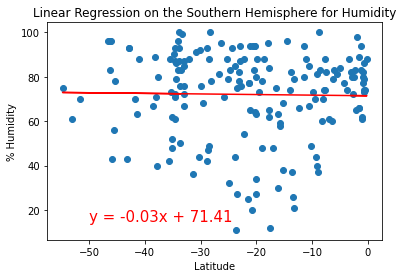

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, plt.title('Linear Regression on the Southern Hemisphere for Humidity'), '% Humidity',(-50,15))

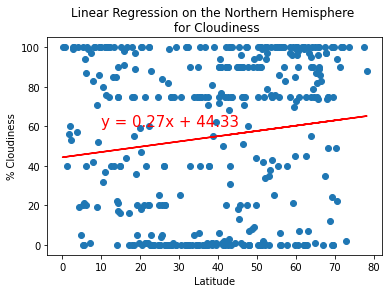

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, plt.title('Linear Regression on the Northern Hemisphere \n for Cloudiness'), '% Cloudiness',(10,60))

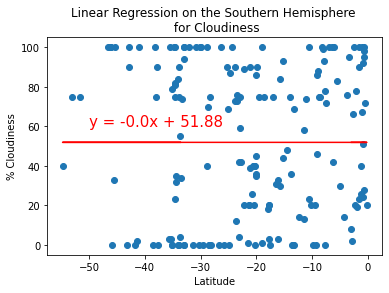

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for Cloudiness'), '% Cloudiness',(-50,60))

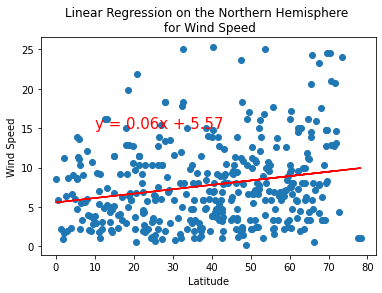

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed'), 'Wind Speed',(10,15))


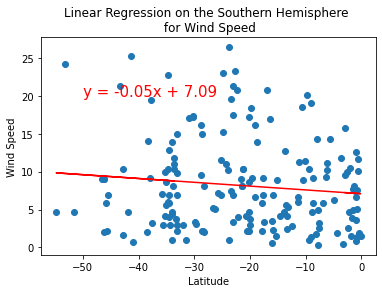

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed'), 'Wind Speed',(-50,20))